In [239]:
import scipy.stats as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Data import

In [240]:
df = pd.read_csv("Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


### Data cleaning and analysis

In [241]:
column_index_to_remove = 0  # 
df.drop(df.columns[column_index_to_remove], axis=1, inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


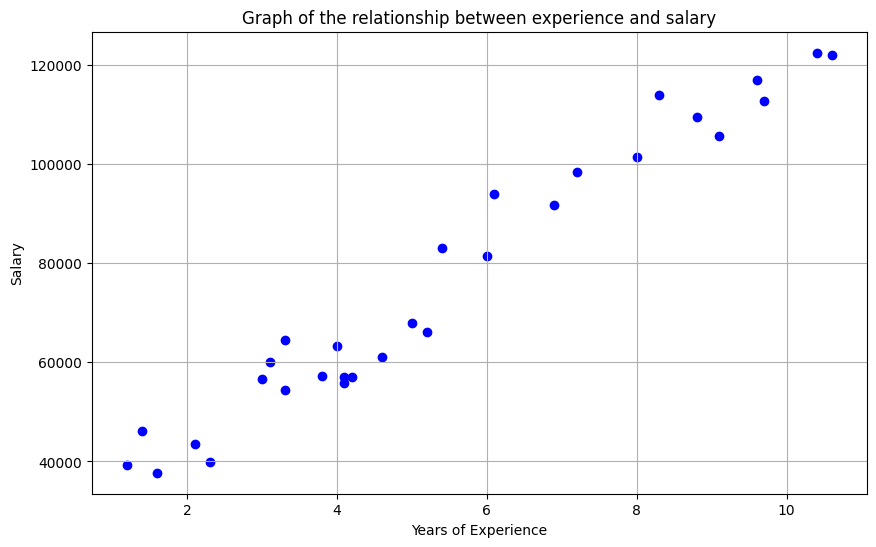

In [244]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', marker='o')
plt.title('Graph of the relationship between experience and salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### Performing a normality test for each column - The Shapiro–Wilk test 

In [245]:
pd.DataFrame({"p-value":[st.shapiro(df[c]).pvalue for c in df]}, index=df.columns)

,p-value
YearsExperience,0.103377
Salary,0.015155


### Calculation of the linear correlation coefficient for each pair of variables

In [246]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Defining features (feat) and target variable (target)

In [247]:
feat = 'YearsExperience'
target = 'Salary'

### Preparation of data for model creation

In [248]:
X = df[feat].to_numpy()
y = df[target].to_numpy()
X = X.reshape(-1, 1)

### Dividing data into training and test sets

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

### Creating a model using Scikit-learn

In [250]:
first_model = LinearRegression()
first_model.fit(X,y)

LinearRegression()

In [251]:
y_0 = first_model.predict(X)

#### Calculation of the basic diagnostic parameters of the model

In [252]:
[first_model.score(X,y), st.pearsonr(y,y_0).statistic**2]

[0.9569566641435086, 0.9569566641435084]

#### Visualization of the model's capabilities

Text(0, 0.5, 'predictions')

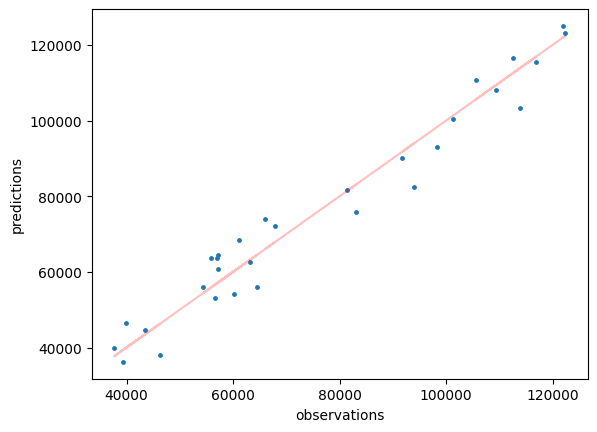

In [253]:
plt.plot(y,y,color="red",alpha=0.25)
plt.scatter(y,y_0,s=6)
plt.xlabel("observations")
plt.ylabel("predictions")

#### Attempt to improve the model

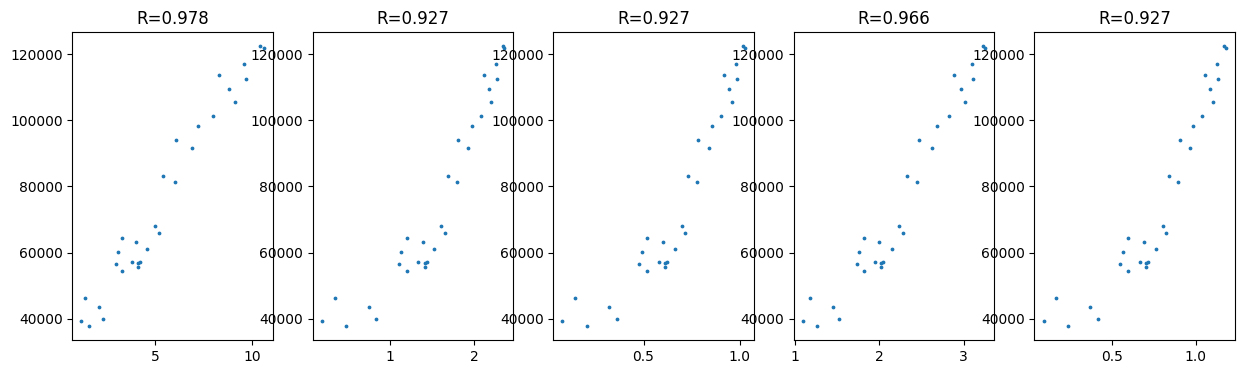

In [254]:
trans_f = [lambda x: x, 
           np.log, 
           np.log10, 
           np.sqrt, 
           lambda x: np.log(np.sqrt(x))] 

fig, axes = plt.subplots(1,len(trans_f),figsize=(15,4))

for f,ax in zip(trans_f,axes):
    ax.scatter(f(df['YearsExperience']), df['Salary'],s=3)
    tR = st.pearsonr(f(df['YearsExperience']), df['Salary']).statistic
    ax.set_title("R="+str(round(tR,3)))

In [255]:
df1 = df.copy()
df1["rYearsExperience"] = np.log10(df["YearsExperience"])
del df1["YearsExperience"] # usunięcie oryginalnej zmiennej
df1

,Salary,rYearsExperience
0,39344.0,0.079181
1,46206.0,0.146128
2,37732.0,0.204120
3,43526.0,0.322219
4,39892.0,0.361728
5,56643.0,0.477121
6,60151.0,0.491362
7,54446.0,0.518514
8,64446.0,0.518514
9,57190.0,0.579784


In [256]:
second_feat = 'rYearsExperience'


In [257]:
X1 = df1[second_feat].to_numpy()
y1 = df1[target].to_numpy()
X1 = X1.reshape(-1, 1)

In [258]:
model1 = LinearRegression()
model1.fit(X1,y)

model1.score(X1,y)

0.8598856127393868

## Creating a model using statsmodels

In [259]:
sm_model0 = sm.OLS(y_train, sm.add_constant(X_train))
res0 = sm_model0.fit()
res0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     650.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           7.81e-18
Time:                        22:12:43   Log-Likelihood:                -238.16
No. Observations:                  24   AIC:                             480.3
Df Residuals:                      22   BIC:                             482.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.748e+04   2265.475     12.129      0.000    2.28e+04    3.22e+04
x1          9276.5060    363.645     25.510      0.000    8522.352       1e+04
==============================================================================
Omnibus:                        0.646   Durbin-Watson:                   2.428
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.720
Skew:                           0.281   Prob(JB):                        0.698
Kurtosis:                       2.364   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
yp_train_sm = res0.predict(sm.add_constant(X_train))
yp_test_sm = res0.predict(sm.add_constant(X_test))

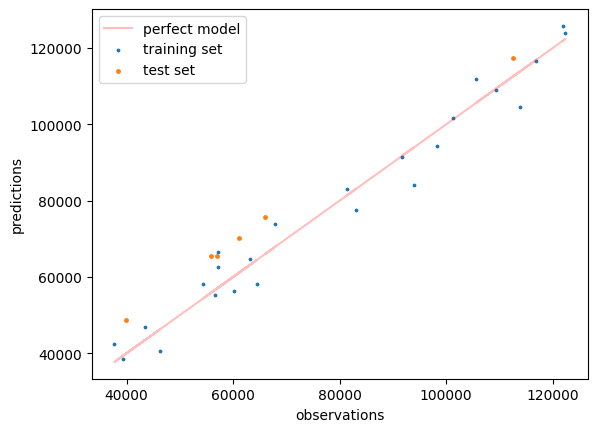

In [261]:
plt.plot(y,y,color="red",alpha=0.25) 
plt.scatter(y_train,yp_train_sm,s=3) 
plt.scatter(y_test,yp_test_sm,s=6) 
plt.xlabel("observations")
plt.ylabel("predictions")
plt.legend(["perfect model","training set","test set"])
